In [21]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Load the Zachary's Karate Club dataset
G = nx.karate_club_graph()

In [26]:
def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explanation on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat
# Convert the graph to an adjacency matrix
adjacency_matrix = graph_to_edge_matrix(G)

# Range of clusters to try
range_n_clusters = range(2,9)

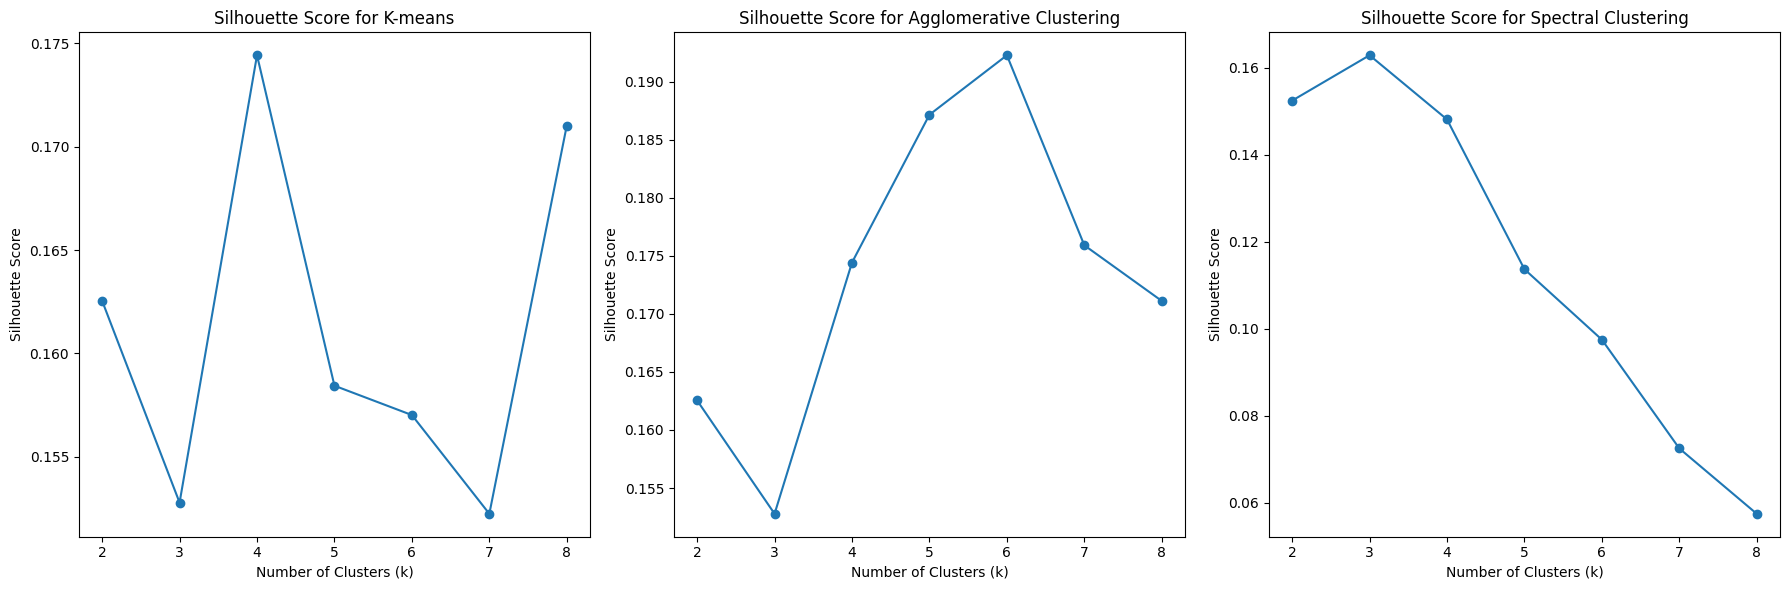

In [27]:
# Initialize lists to store silhouette scores
silhouette_scores_kmeans = []
silhouette_scores_agglomerative = []
silhouette_scores_spectral = []

# Iterate through different numbers of clusters
for n_clusters in range_n_clusters:
    # K-means
    model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_assignments_kmeans = model_kmeans.fit_predict(adjacency_matrix)
    silhouette_scores_kmeans.append(silhouette_score(adjacency_matrix, cluster_assignments_kmeans))

    # Agglomerative Clustering
    model_agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_assignments_agglomerative = model_agglomerative.fit_predict(adjacency_matrix)
    silhouette_scores_agglomerative.append(silhouette_score(adjacency_matrix, cluster_assignments_agglomerative))

    # Spectral Clustering
    model_spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
    cluster_assignments_spectral = model_spectral.fit_predict(adjacency_matrix)
    silhouette_scores_spectral.append(silhouette_score(adjacency_matrix, cluster_assignments_spectral))

# Plot the Silhouette Scores for different numbers of clusters
plt.figure(figsize=(18, 6))

# K-means plot
plt.subplot(1, 3, 1)
plt.plot(range_n_clusters, silhouette_scores_kmeans, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means')

# Agglomerative Clustering plot
plt.subplot(1, 3, 2)
plt.plot(range_n_clusters, silhouette_scores_agglomerative, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering')

# Spectral Clustering plot
plt.subplot(1, 3, 3)
plt.plot(range_n_clusters, silhouette_scores_spectral, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Spectral Clustering')

plt.tight_layout()
plt.show()
